# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pandas.io.json import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

In [4]:
# Set up lists
lon = []
lat = []
humidity = []
temp = []
cloud = []
wind = []
country = []
date = []
city_name = []
records = 1

print("Beginning Data Retrieval")
print("------------------------")

# Loop through each city and pull the data
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]['humidity'])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_name.append(response["name"])
        city_record = response["name"]
        print(f"Processing Records {records} | {city_record}")
        
        records += 1
    
    except:
        print("City not found. Skipping...")
        
    pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Records 1 | Diego de Almagro
Processing Records 2 | Alofi
Processing Records 3 | Bathsheba
Processing Records 4 | Sittwe
Processing Records 5 | Rikitea
Processing Records 6 | Oranjemund
Processing Records 7 | Boda
Processing Records 8 | Yangi Marg`ilon
Processing Records 9 | Mar del Plata
Processing Records 10 | Ushuaia
Processing Records 11 | Bandarbeyla
Processing Records 12 | Boende
Processing Records 13 | Bluff
Processing Records 14 | Kapaa
Processing Records 15 | Barrow
Processing Records 16 | Souillac
Processing Records 17 | Tambopata
Processing Records 18 | Nikolskoye
Processing Records 19 | Mataura
Processing Records 20 | Mayo
Processing Records 21 | Cape Town
Processing Records 22 | Jamestown
Processing Records 23 | Grafton
Processing Records 24 | Busselton
Processing Records 25 | Tupik
City not found. Skipping...
Processing Records 26 | Paraíso
Processing Records 27 | Albany
Processing Records 28 | Kumul
Processing 

Processing Records 221 | Kozhevnikovo
Processing Records 222 | Puerto Escondido
Processing Records 223 | Fairbanks
Processing Records 224 | Nome
Processing Records 225 | Bulgan
City not found. Skipping...
Processing Records 226 | Caravelas
Processing Records 227 | Uruçuí
Processing Records 228 | Vila Velha
Processing Records 229 | Tarakan
Processing Records 230 | Pemberton
Processing Records 231 | Yining
Processing Records 232 | Abu Kamal
Processing Records 233 | Saint-Augustin
Processing Records 234 | Pitimbu
Processing Records 235 | Lengshuitan
Processing Records 236 | Mangai
Processing Records 237 | Bilibino
Processing Records 238 | Banepā
Processing Records 239 | Quirinópolis
Processing Records 240 | Escobal
Processing Records 241 | Lüderitz
City not found. Skipping...
Processing Records 242 | Kisangani
Processing Records 243 | Yulara
Processing Records 244 | Avenal
Processing Records 245 | Nanortalik
Processing Records 246 | Provideniya
Processing Records 247 | Lagoa
Processing Re

Processing Records 443 | Derzhavīnsk
Processing Records 444 | Daurāla
Processing Records 445 | Nocrich
Processing Records 446 | Colares
Processing Records 447 | Imeni Poliny Osipenko
Processing Records 448 | San Jerónimo
Processing Records 449 | Ballina
Processing Records 450 | Zapolyarnyy
Processing Records 451 | Katsuura
Processing Records 452 | Kemisē
Processing Records 453 | Pevek
Processing Records 454 | Nizwá
Processing Records 455 | Mozarlândia
Processing Records 456 | Muhafazat Lahij
City not found. Skipping...
Processing Records 457 | Caçu
Processing Records 458 | Pirassununga
Processing Records 459 | Karakol
Processing Records 460 | Graaff-Reinet
Processing Records 461 | Soure
Processing Records 462 | Kurumkan
Processing Records 463 | Suşehri
Processing Records 464 | Marshall
Processing Records 465 | Verkhoyansk
Processing Records 466 | Brae
Processing Records 467 | Guarapari
Processing Records 468 | Esperance
Processing Records 469 | Wattegama
Processing Records 470 | Beldān

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# pandas.read_json(json.dumps(response)).to_csv("weather.csv")

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

# Convert to a DataFrame
city_weather_df = pd.DataFrame(weather)
city_weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Diego de Almagro,-26.37,-70.05,59.13,31,0,8.50,CL,1595524001
1,Alofi,-19.06,-169.92,73.40,100,73,10.29,NU,1595524001
2,Bathsheba,13.22,-59.52,87.80,58,40,17.22,BB,1595523977
3,Sittwe,20.15,92.90,81.55,83,100,8.34,MM,1595524002
4,Rikitea,-23.12,-134.97,66.76,66,3,19.04,PF,1595524002
...,...,...,...,...,...,...,...,...,...
583,Westport,41.14,-73.36,83.17,74,75,10.29,US,1595523879
584,Lázaro Cárdenas,17.96,-102.20,86.13,64,93,3.94,MX,1595523993
585,Ust'-Omchug,61.15,149.63,51.30,72,53,3.15,RU,1595524110
586,Cefalù,38.04,14.02,82.71,64,0,4.00,IT,1595524111


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = (city_weather_df.index.values[city_weather_df["Humidity"] > 100])

array([], dtype=int64)

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_weather_df = city_weather_df.drop(index=humid_cities, inplace=False)
clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Diego de Almagro,-26.37,-70.05,59.13,31,0,8.50,CL,1595524001
1,Alofi,-19.06,-169.92,73.40,100,73,10.29,NU,1595524001
2,Bathsheba,13.22,-59.52,87.80,58,40,17.22,BB,1595523977
3,Sittwe,20.15,92.90,81.55,83,100,8.34,MM,1595524002
4,Rikitea,-23.12,-134.97,66.76,66,3,19.04,PF,1595524002
...,...,...,...,...,...,...,...,...,...
583,Westport,41.14,-73.36,83.17,74,75,10.29,US,1595523879
584,Lázaro Cárdenas,17.96,-102.20,86.13,64,93,3.94,MX,1595523993
585,Ust'-Omchug,61.15,149.63,51.30,72,53,3.15,RU,1595524110
586,Cefalù,38.04,14.02,82.71,64,0,4.00,IT,1595524111


In [9]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

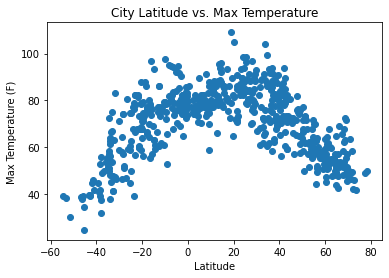

In [10]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Temperature"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

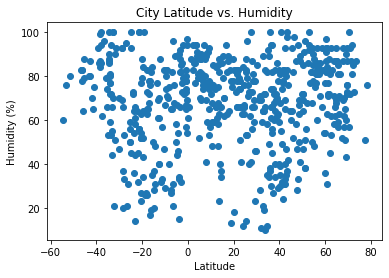

In [11]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Humidity"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatvsHumid.png")
plt.show()

## Latitude vs. Cloudiness Plot

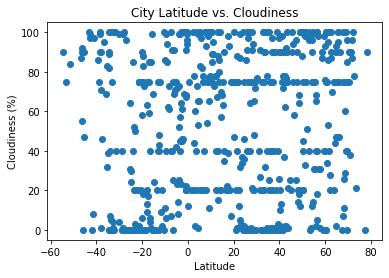

In [12]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Cloudiness"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatvsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

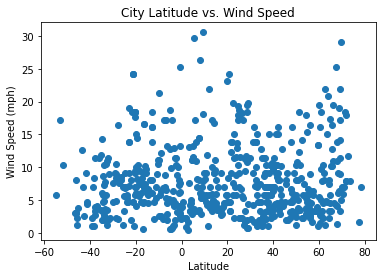

In [13]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Wind Speed"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatvsWindSpeed.png")
plt.show()

## Linear Regression

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearplt(x_values, y_values, ylabel, coordinates):
    plt.scatter(x_values, y_values)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")

    plt.xlabel("Latitude")
    plt.ylabel(ylabel)

In [37]:
# Create Northern Hemisphere DataFrame
northern_clean_city_weather_df = (city_weather_df.loc[city_weather_df["Latitude"] >= 0])
northern_clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
2,Bathsheba,13.22,-59.52,87.80,58,40,17.22,BB,1595523977
3,Sittwe,20.15,92.90,81.55,83,100,8.34,MM,1595524002
6,Boda,4.32,17.47,73.42,89,99,5.03,CF,1595524002
7,Yangi Marg`ilon,40.43,71.72,84.20,30,10,6.93,UZ,1595523983
10,Bandarbeyla,9.49,50.81,76.96,77,78,30.56,SO,1595523882
...,...,...,...,...,...,...,...,...,...
583,Westport,41.14,-73.36,83.17,74,75,10.29,US,1595523879
584,Lázaro Cárdenas,17.96,-102.20,86.13,64,93,3.94,MX,1595523993
585,Ust'-Omchug,61.15,149.63,51.30,72,53,3.15,RU,1595524110
586,Cefalù,38.04,14.02,82.71,64,0,4.00,IT,1595524111


In [38]:
# Create Southern Hemisphere DataFrame
southern_clean_city_weather_df = (city_weather_df.loc[city_weather_df["Latitude"] < 0])
southern_clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Diego de Almagro,-26.37,-70.05,59.13,31,0,8.50,CL,1595524001
1,Alofi,-19.06,-169.92,73.40,100,73,10.29,NU,1595524001
4,Rikitea,-23.12,-134.97,66.76,66,3,19.04,PF,1595524002
5,Oranjemund,-28.55,16.43,74.28,20,0,8.95,NA,1595524002
8,Mar del Plata,-38.00,-57.56,55.72,100,90,3.36,AR,1595523856
...,...,...,...,...,...,...,...,...,...
573,Rio Grande,-32.03,-52.10,83.05,51,100,11.41,BR,1595523978
574,El Alto,-4.27,-81.21,78.80,54,8,17.22,PE,1595524108
575,Nova Viçosa,-17.89,-39.37,76.21,65,13,7.74,BR,1595524109
576,Paraná,-31.73,-60.52,47.34,90,100,8.99,AR,1595524012


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

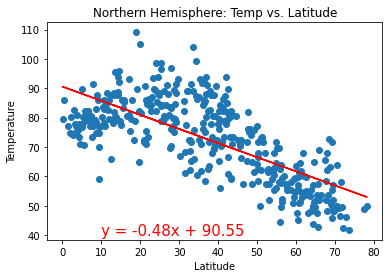

In [39]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Temperature"]
linearplt(x_values, y_values, "Temperature", (10,40))
plt.title("Northern Hemisphere: Temp vs. Latitude")
plt.savefig("Images/NHTempvsLat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

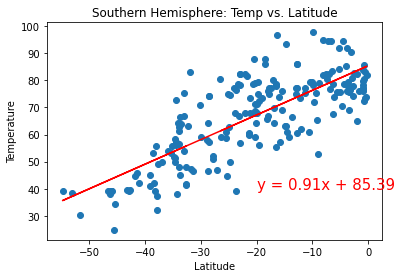

In [40]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Temperature"]
linearplt(x_values, y_values, "Temperature", (-20,40))
plt.title("Southern Hemisphere: Temp vs. Latitude")
plt.savefig("Images/SHTempvsLat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

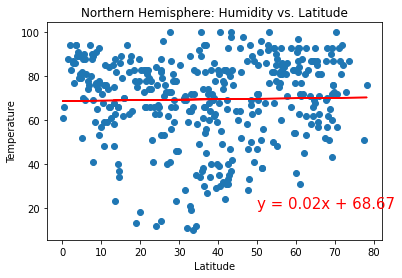

In [51]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Humidity"]
linearplt(x_values, y_values, "Temperature", (50,20))
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.savefig("Images/NHHumidvsLat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

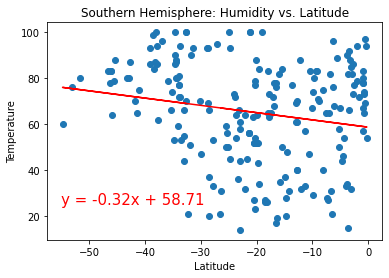

In [50]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Humidity"]
linearplt(x_values, y_values, "Temperature", (-55,25))
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.savefig("Images/SHumidvsLat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

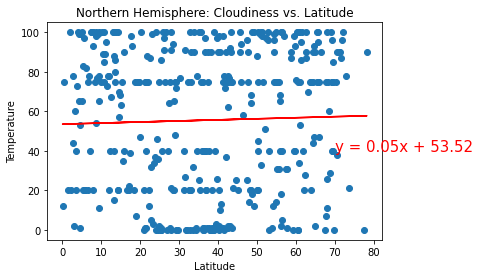

In [53]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Cloudiness"]
linearplt(x_values, y_values, "Temperature", (70,40))

plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("Images/NHCloudvsLat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

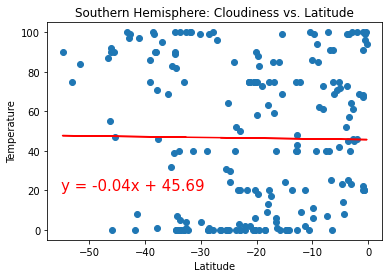

In [55]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Cloudiness"]
linearplt(x_values, y_values, "Temperature", (-55,20))

plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("Images/SHCloudvsLat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

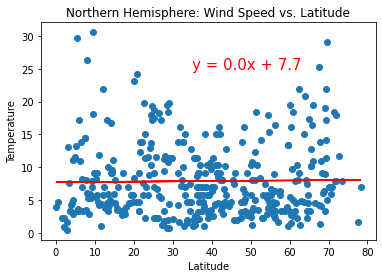

In [59]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Wind Speed"]
linearplt(x_values, y_values, "Temperature", (35,25))

plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("Images/NHWindvsLat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

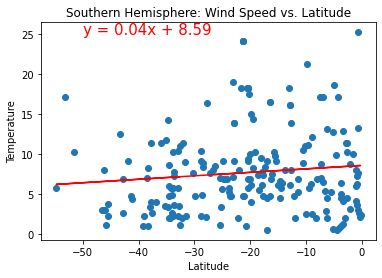

In [61]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Wind Speed"]
linearplt(x_values, y_values, "Temperature", (-50,25))

plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("Images/SHWindvsLat.png")
plt.show()